# Lista de Exercícios + Prova - MAC0459 Ciência e Engenharia de Dados

Ricardo Hideki Hangai Kojo - 10295429

## Lista de Exercícios

### Q1

Uma árvore de decisão treinada sem restrições tem uma folha por instância do _training set_. Considerando que a árvore de decisão formada é binária, temos que a profundidade aproximada é de:

$log_2(10.000.000) = log_2(10^7) ≃ 23$

### Q2

_**Generally lower**_

### Q3

_**Yes**, decreasing max_depth in case of overfitting may help relieve the problem, as there may be less nodes/leaves in the Decision Tree._

### Q4

_**No**. Feature scalling is irrelevant to Decision Trees. Therefore, it scalling input features on a underfitting Decision Tree won't make any difference._

### Q5

A complexidade de treinar uma _Decision Tree_ é O(n * m log(m)).

Multiplicando por 10, temos:

$
K = \frac{(n * 10m * log(10m))}{(n * m * log(m))}
  = \frac{10log(10m)}{log(m)}
  = \frac{10log(10^8)}{log(10^7)}
  ≃ 11.4285
$

Logo, temos que a quantidade de horas para treinar outra _Decision Tree_ com um _training set_ similar de 10mi instâncias é de aproximadamente **11.42 horas**

### Q6

## Prova

### Q1

O _dataset_ é **Dados Estatísticos do Transporte Aéreo** é um conjunto de dados disponibilizado e mantido pela ANAC (Agência Nacional de Aviação Civil) que contém dados sobre o transporte aéreo no Brasil, incluindo voos domésticos e internacionais, regulares ou não, e com dados sobre passageiros, distância, bagagem, combustível, entre outros. Os dados são atualizados mensalmente e possuem registros de voos a partir do ano 2000.

Seguem as questões a serem respondidas pela EDA:

1. **Qual o ano com maior quantidade de voos?**
2. **Qual o mês do ano com maior quantidade de voos?**
3. **Qual a relação entre a distância e os outros campos do dataset?**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
flights2 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/dados-estatisticos.csv", sep=";", encoding='latin-1')

In [4]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887384 entries, 0 to 887383
Data columns (total 38 columns):
EMPRESA (SIGLA)                                       887384 non-null object
EMPRESA (NOME)                                        887384 non-null object
EMPRESA (NACIONALIDADE)                               887384 non-null object
ANO                                                   887384 non-null int64
MÊS                                                   887384 non-null int64
AEROPORTO DE ORIGEM (SIGLA)                           887384 non-null object
AEROPORTO DE ORIGEM (NOME)                            887370 non-null object
AEROPORTO DE ORIGEM (UF)                              772870 non-null object
AEROPORTO DE ORIGEM (REGIÃO)                          772876 non-null object
AEROPORTO DE ORIGEM (PAÍS)                            887370 non-null object
AEROPORTO DE ORIGEM (CONTINENTE)                      887370 non-null object
AEROPORTO DE DESTINO (SIGLA)                

In [8]:
flights2.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"254975,00","31,00","1407387975,00","0,00","148050,00","6541,00","1085000,00",NaN,NaN
1,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"221444,00","29,00","2327521524,00","0,00","84385436,00","6119,00","1015000,00",NaN,NaN
2,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"419392,00","64,00","5257408943,00","0,00","39593361,00","13504,00","2240000,00",NaN,NaN
3,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"35247,00","31,00","54662412,00","0,00","758379,00","6541,00","837000,00",NaN,NaN
4,AAL,AMERICAN AIRLINES,ESTRANGEIRA,2000,1,SBGR,SÃO PAULO - GUARULHOS,SP,SUDESTE,BRASIL,...,NaN,"47010,00","30,00","100151671,00","0,00","3301669,00","6330,00","1053001,00",NaN,NaN


In [9]:
flights2.tail()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
887379,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,7,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"0,00","0,00","683648000,00","0,00","0,00","0,00","0,00",NaN,NaN
887380,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,GVAC,ILHA DO SAL,NaN,NaN,CABO VERDE,...,NaN,"4577,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN
887381,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,MMGL,GUADALAJARA/INTL,NaN,NaN,MÉXICO,...,NaN,"8182,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN
887382,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"0,00","0,00","541200000,00","0,00","0,00","0,00","0,00",NaN,NaN
887383,VDA,VOLGA DNEPR,ESTRANGEIRA,2019,8,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,...,NaN,"5263,00","1,00","0,00","0,00","0,00","0,00","120000,00",NaN,NaN


#### 1. **Qual o ano com maior quantidade de voos?**

In [36]:
max_flights_by_year =  flights2['ANO'].value_counts().max()
max_flights_by_year

58228

In [21]:
flights_per_year =  flights2['ANO'].value_counts().sort_index()
flights_per_year

2000    48334
2001    48437
2002    47098
2003    39520
2004    39955
2005    40786
2006    53207
2007    58228
2008    45877
2009    37685
2010    45065
2011    48112
2012    50337
2013    49792
2014    46420
2015    44233
2016    39569
2017    39501
2018    39802
2019    25426
Name: ANO, dtype: int64

In [25]:
regular_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Regular']['ANO'].value_counts().sort_index()
regular_flights_per_year

2000    31871
2001    30997
2002    30279
2003    25746
2004    26477
2005    28076
2006    33967
2007    37124
2008    33496
2009    27127
2010    30625
2011    35965
2012    35214
2013    34042
2014    30076
2015    30785
2016    26473
2017    25439
2018    27446
2019    17304
Name: ANO, dtype: int64

In [31]:
non_regular_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Não-regular']['ANO'].value_counts().sort_index()
non_regular_flights_per_year

2000    12949
2001    13987
2002    13691
2003    11100
2004    10622
2005    10195
2006    16239
2007    17027
2008     9365
2009     7802
2010    10661
2011     8179
2012    10463
2013    10710
2014    11774
2015     9312
2016     9458
2017    10505
2018     8537
2019     5517
Name: ANO, dtype: int64

In [32]:
2007    58228improductive_flights_per_year =  flights2[flights2['GRUPO DE VOO'] == 'Improdutivo']['ANO'].value_counts().sort_index()
improductive_flights_per_year

2000    3514
2001    3453
2002    3128
2003    2674
2004    2848
2005    2515
2006    3000
2007    4073
2008    3016
2009    2756
2010    3779
2011    3968
2012    4660
2013    5040
2014    4570
2015    4136
2016    3638
2017    3557
2018    3819
2019    2605
Name: ANO, dtype: int64

In [34]:
domestic_flights_per_year =  flights2[flights2['NATUREZA'] == 'Doméstica']['ANO'].value_counts().sort_index()
domestic_flights_per_year

2000    40903
2001    41156
2002    39643
2003    31351
2004    30870
2005    31983
2006    42509
2007    47030
2008    36650
2009    30400
2010    34917
2011    37073
2012    37182
2013    36812
2014    32751
2015    31640
2016    27343
2017    27629
2018    27239
2019    17511
Name: ANO, dtype: int64

In [35]:
international_flights_per_year =  flights2[flights2['NATUREZA'] == 'Internacional']['ANO'].value_counts().sort_index()
international_flights_per_year

2000     7431
2001     7281
2002     7455
2003     8169
2004     9085
2005     8803
2006    10698
2007    11198
2008     9227
2009     7285
2010    10148
2011    11039
2012    13155
2013    12980
2014    13669
2015    12593
2016    12226
2017    11872
2018    12563
2019     7915
Name: ANO, dtype: int64

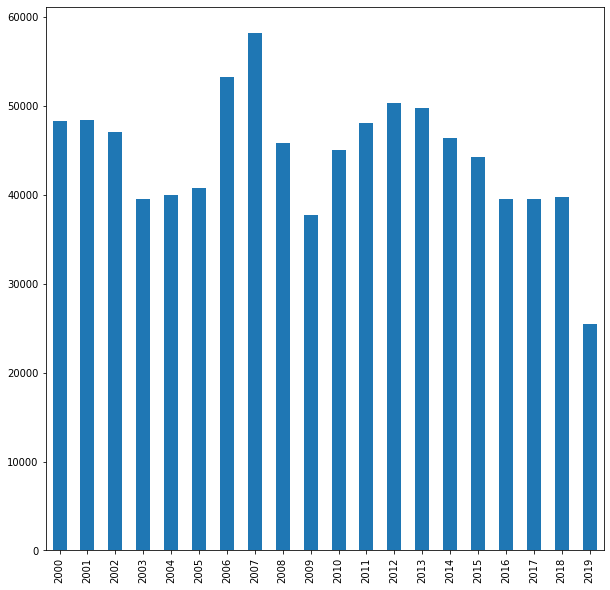

In [22]:
flights_per_year.plot.bar(figsize=(10,10))

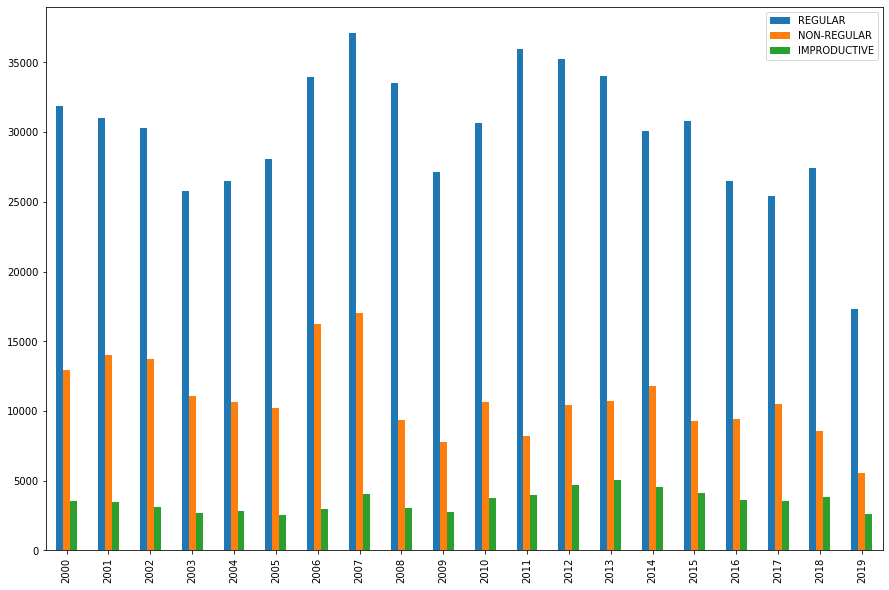

In [42]:
flights_by_group = pd.DataFrame({'REGULAR': regular_flights_per_year,
                                 'NON-REGULAR': non_regular_flights_per_year,
                                 'IMPRODUCTIVE': improductive_flights_per_year
                                }, index=[i for i in range(2000, 2020)])
flights_by_group.plot.bar(figsize=(15,10))

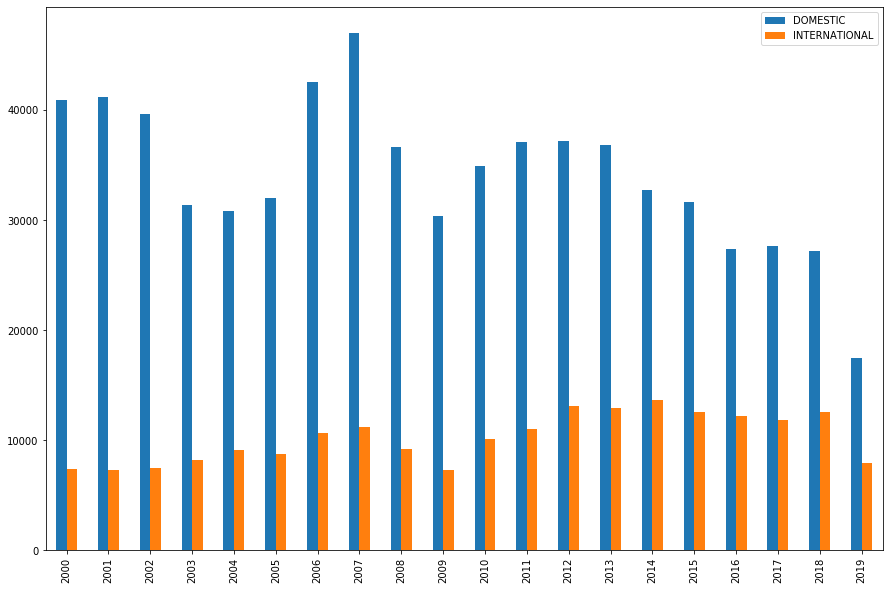

In [43]:
flights_by_nature = pd.DataFrame({'DOMESTIC': domestic_flights_per_year,
                                 'INTERNATIONAL': international_flights_per_year,
                                }, index=[i for i in range(2000, 2020)])
flights_by_nature.plot.bar(figsize=(15,10))

#### 2. Qual o mês do ano com maior quantidade de voos?

In [5]:
max_flights_by_month =  flights2['MÊS'].value_counts().max()
max_flights_by_month

81632

In [6]:
flights_per_month =  flights2['MÊS'].value_counts().sort_index()
flights_per_month

1     81632
2     78402
3     72946
4     73858
5     69708
6     72494
7     79137
8     72897
9     67886
10    70418
11    68749
12    79257
Name: MÊS, dtype: int64

In [7]:
regular_flights_per_month =  flights2[flights2['GRUPO DE VOO'] == 'Regular']['MÊS'].value_counts().sort_index()
regular_flights_per_month

1     53710
2     53062
3     49799
4     51586
5     48638
6     48841
7     52928
8     51016
9     46374
10    46183
11    45969
12    50423
Name: MÊS, dtype: int64

In [9]:
non_regular_flights_per_month =  flights2[flights2['GRUPO DE VOO'] == 'Não-regular']['MÊS'].value_counts().sort_index()
non_regular_flights_per_month

1     21789
2     19703
3     17252
4     16266
5     15227
6     17108
7     19608
8     16457
9     16100
10    18453
11    17357
12    22773
Name: MÊS, dtype: int64

In [10]:
improductive_flights_per_month =  flights2[flights2['GRUPO DE VOO'] == 'Improdutivo']['MÊS'].value_counts().sort_index()
improductive_flights_per_month

1     6133
2     5637
3     5895
4     6005
5     5843
6     6545
7     6601
8     5412
9     5412
10    5782
11    5423
12    6061
Name: MÊS, dtype: int64

In [11]:
domestic_flights_per_month =  flights2[flights2['NATUREZA'] == 'Doméstica']['MÊS'].value_counts().sort_index()
domestic_flights_per_month

1     63447
2     60862
3     55413
4     56377
5     53254
6     55816
7     61091
8     55826
9     51961
10    54163
11    52679
12    61703
Name: MÊS, dtype: int64

In [12]:
international_flights_per_month =  flights2[flights2['NATUREZA'] == 'Internacional']['MÊS'].value_counts().sort_index()
international_flights_per_month

1     18185
2     17540
3     17533
4     17481
5     16454
6     16678
7     18046
8     17071
9     15925
10    16255
11    16070
12    17554
Name: MÊS, dtype: int64

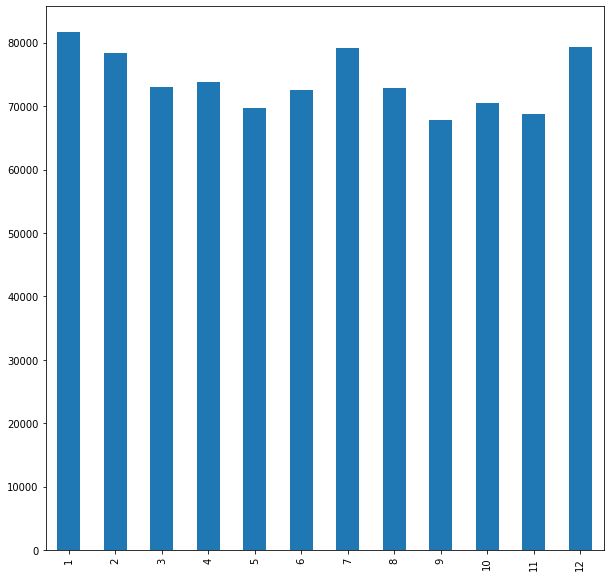

In [13]:
flights_per_month.plot.bar(figsize=(10,10))

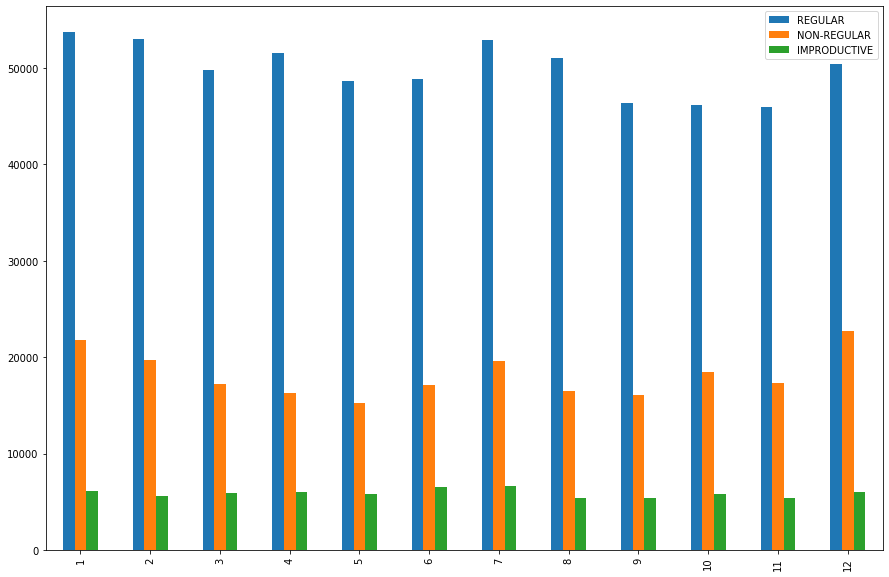

In [14]:
monthly_flights_by_group = pd.DataFrame({'REGULAR': regular_flights_per_month,
                                 'NON-REGULAR': non_regular_flights_per_month,
                                 'IMPRODUCTIVE': improductive_flights_per_month
                                }, index=[i for i in range(1, 13)])
monthly_flights_by_group.plot.bar(figsize=(15,10))

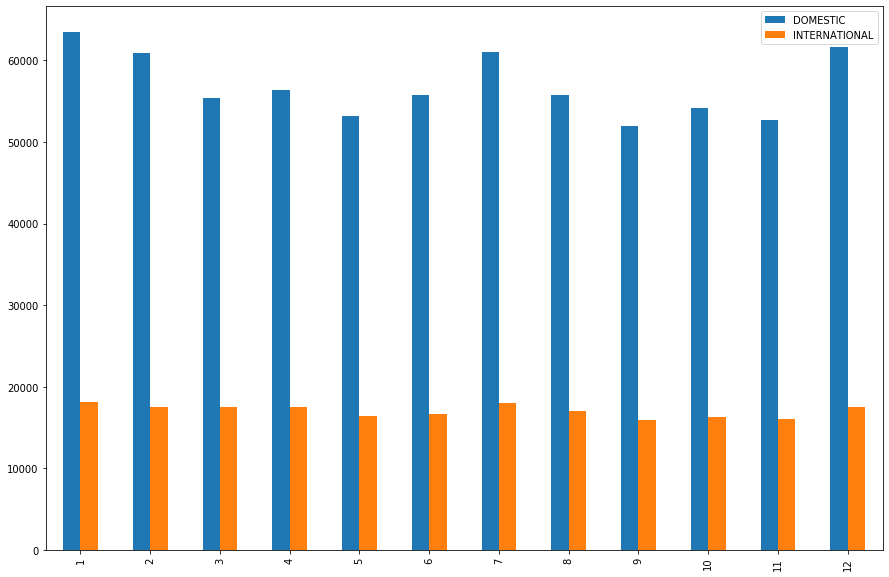

In [16]:
monthly_flights_by_nature = pd.DataFrame({'DOMESTIC': domestic_flights_per_month,
                                 'INTERNATIONAL': international_flights_per_month,
                                }, index=[i for i in range(1, 13)])
monthly_flights_by_nature.plot.bar(figsize=(15,10))

#### 3. Qual a relação entre a distância e os outros campos do dataset?

In [61]:
flights2['PASSAGEIROS PAGOS'] = [str(x).replace(',', '.') for x in flights2['PASSAGEIROS PAGOS']]
flights2['PASSAGEIROS GRÁTIS'] = [str(x).replace(',', '.') for x in flights2['PASSAGEIROS GRÁTIS']]
flights2['CARGA PAGA (KG)'] = [str(x).replace(',', '.') for x in flights2['CARGA PAGA (KG)']]
flights2['CARGA GRÁTIS (KG)'] = [str(x).replace(',', '.') for x in flights2['CARGA GRÁTIS (KG)']]
flights2['CORREIO (KG)'] = [str(x).replace(',', '.') for x in flights2['CORREIO (KG)']]
flights2['ASK'] = [str(x).replace(',', '.') for x in flights2['ASK']]
flights2['RPK'] = [str(x).replace(',', '.') for x in flights2['RPK']]
flights2['ATK'] = [str(x).replace(',', '.') for x in flights2['ATK']]
flights2['RTK'] = [str(x).replace(',', '.') for x in flights2['RTK']]
flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'] = [str(x).replace(',', '.') for x in flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS']]
flights2['DISTÂNCIA VOADA (KM)'] = [str(x).replace(',', '.') for x in flights2['DISTÂNCIA VOADA (KM)']]
flights2['DECOLAGENS'] = [str(x).replace(',', '.') for x in flights2['DECOLAGENS']]
flights2['CARGA PAGA KM'] = [str(x).replace(',', '.') for x in flights2['CARGA PAGA KM']]
flights2['CARGA GRATIS KM'] = [str(x).replace(',', '.') for x in flights2['CARGA GRATIS KM']]
flights2['CORREIO KM'] = [str(x).replace(',', '.') for x in flights2['CORREIO KM']]
flights2['ASSENTOS'] = [str(x).replace(',', '.') for x in flights2['ASSENTOS']]
flights2['PAYLOAD'] = [str(x).replace(',', '.') for x in flights2['PAYLOAD']]
flights2['HORAS VOADAS'] = [str(x).replace(',', '.') for x in flights2['HORAS VOADAS']]
flights2['BAGAGEM (KG)'] = [str(x).replace(',', '.') for x in flights2['BAGAGEM (KG)']]

In [62]:
flights2['PASSAGEIROS PAGOS'] = pd.to_numeric(flights2['PASSAGEIROS PAGOS'], errors="coerce")
flights2['PASSAGEIROS GRÁTIS'] = pd.to_numeric(flights2['PASSAGEIROS GRÁTIS'], errors="coerce")
flights2['CARGA PAGA (KG)'] = pd.to_numeric(flights2['CARGA PAGA (KG)'], errors="coerce")
flights2['CARGA GRÁTIS (KG)'] = pd.to_numeric(flights2['CARGA GRÁTIS (KG)'], errors="coerce")
flights2['CORREIO (KG)'] = pd.to_numeric(flights2['CORREIO (KG)'], errors="coerce")
flights2['ASK'] = pd.to_numeric(flights2['ASK'], errors="coerce")
flights2['RPK'] = pd.to_numeric(flights2['RPK'], errors="coerce")
flights2['ATK'] = pd.to_numeric(flights2['ATK'], errors="coerce")
flights2['RTK'] = pd.to_numeric(flights2['RTK'], errors="coerce")
flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'] = pd.to_numeric(flights2['COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS'], errors="coerce")
flights2['DISTÂNCIA VOADA (KM)'] = pd.to_numeric(flights2['DISTÂNCIA VOADA (KM)'], errors="coerce")
flights2['DECOLAGENS'] = pd.to_numeric(flights2['DECOLAGENS'], errors="coerce")
flights2['CARGA PAGA KM'] = pd.to_numeric(flights2['CARGA PAGA KM'], errors="coerce")
flights2['CARGA GRATIS KM'] = pd.to_numeric(flights2['CARGA GRATIS KM'], errors="coerce")
flights2['CORREIO KM'] = pd.to_numeric(flights2['CORREIO KM'], errors="coerce")
flights2['ASSENTOS'] = pd.to_numeric(flights2['ASSENTOS'], errors="coerce")
flights2['PAYLOAD'] = pd.to_numeric(flights2['PAYLOAD'], errors="coerce")
flights2['HORAS VOADAS'] = pd.to_numeric(flights2['HORAS VOADAS'], errors="coerce")
flights2['BAGAGEM (KG)'] = pd.to_numeric(flights2['BAGAGEM (KG)'], errors="coerce")
flights2.corr()

,ANO,MÊS,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,...,COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS,DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
ANO,1.000000,-0.027832,0.178962,0.064299,0.048571,-0.002096,0.008080,0.097277,0.113380,0.090151,...,0.067464,0.092631,0.043765,0.033316,-0.002076,0.010471,0.090527,0.099847,0.124757,0.182556
MÊS,-0.027832,1.000000,0.005634,0.002010,0.014040,-0.003285,0.007424,-0.000462,-0.000084,0.002490,...,0.001536,-0.000047,0.000690,0.007299,0.001937,0.007078,0.001319,0.005220,0.002860,0.003240
PASSAGEIROS PAGOS,0.178962,0.005634,1.000000,0.739057,0.207369,0.058440,-0.016504,0.515619,0.505646,0.359856,...,0.612228,0.622348,0.897400,0.074890,0.003343,0.036871,0.951763,0.899307,0.845634,0.892379
PASSAGEIROS GRÁTIS,0.064299,0.002010,0.739057,1.000000,0.146248,0.073490,-0.006504,0.324259,0.295695,0.226132,...,0.470909,0.418500,0.753361,0.040145,0.003414,0.026971,0.764259,0.719986,0.648224,0.640918
CARGA PAGA (KG),0.048571,0.014040,0.207369,0.146248,1.000000,0.028394,0.034519,0.389919,0.398138,0.492711,...,0.442970,0.428789,0.111143,0.664416,0.011475,0.123339,0.157200,0.295065,0.350027,0.311054
CARGA GRÁTIS (KG),-0.002096,-0.003285,0.058440,0.073490,0.028394,1.000000,0.005542,0.033851,0.032588,0.029954,...,0.037751,0.042738,0.055435,0.024509,0.095619,0.012489,0.058936,0.061227,0.051723,0.051307
CORREIO (KG),0.008080,0.007424,-0.016504,-0.006504,0.034519,0.005542,1.000000,0.026277,0.028711,0.044173,...,0.018615,0.030879,-0.002251,0.020734,0.001126,0.669219,-0.028504,0.035832,-0.009524,-0.029322
ASK,0.097277,-0.000462,0.515619,0.324259,0.389919,0.033851,0.026277,1.000000,0.965267,0.880021,...,0.956632,0.934162,0.331572,0.364301,0.012700,0.248653,0.469059,0.535754,0.862931,0.758843
RPK,0.113380,-0.000084,0.505646,0.295695,0.398138,0.032588,0.028711,0.965267,1.000000,0.853162,...,0.934988,0.910278,0.296761,0.381633,0.013789,0.258199,0.430710,0.498544,0.827009,0.746032
ATK,0.090151,0.002490,0.359856,0.226132,0.492711,0.029954,0.044173,0.880021,0.853162,1.000000,...,0.946827,0.838399,0.204972,0.460596,0.010991,0.260654,0.317531,0.488900,0.754865,0.635395


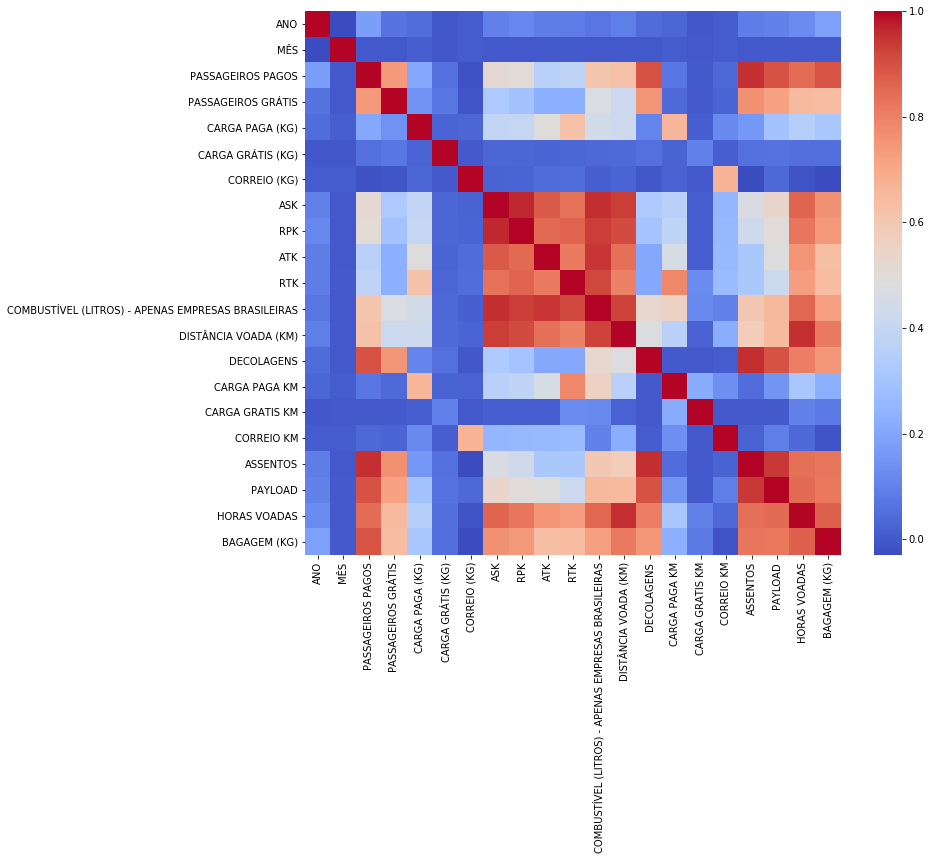

In [66]:
plt.figure(figsize = (12,10))
seaborn.heatmap(flights2.corr(), cmap='coolwarm')

### Explicando a estratégia utilizada

As questões levantadas surgiram após uma breve análise do _dataset_ disponibilizado.

#### Primeira questão -  Qual o ano com maior quantidade de voos?

Para responder esta questão, bastava fazer uma contagem pela coluna _ANO_ e pegar o maior valor. Sendo assim, foi fácil descobrir que o ano com maior quantidade de voos registrados foi o ano de **2007**, com um total de **58228**.

Explorando mais esta questão, foi feita a contagem baseada nas colunas _grupo de voo_ e _natureza_ , que categorizam o tipo de voo. Os _grupos de voo_ podem ser: _regular_ , _não regular_ ou _improdutivo_ , enquanto a _natureza_ pode ser _nacional_ ou _internacional_ . Essas classificações são explicadas na descrição do _dataset_ no próprio site da ANAC.

Depois, foram criadas três gráficos de barras para visualizar a evolução da quantidade de voos com o passar dos anos.  O primeiro mostra a contagem total de voos, o segundo separa por _grupo de voo_ e o terceiro separa por _natureza_ .

Seguem algumas observações interessantes sobre a análise desta pergunta:
* Os dados vão de 2000 à 2019. Os valores iniciam estáveis entre 2000 ~ 2002, tem uma queda entre 2003 ~ 2005, depois um grande aumento em 2006/2007, uma grande queda em 2008/2009, outro aumento em 2010 ~ 2013, outra queda em 2014 e depois se estabiliza novamente;
* É possível relacionar as grandes quedas em 2008 e 2014 à crise 2008, com a quebra de grandes bancos nos EUA, e com a crise econômica brasileira que se iniciou em 2014;
* A maioria dos voos são regulares, seguidos de não-regulares e de improdutivos;
* A maioria dos voos são nacionais, seguidos de internacionais.

Por fim, foi possível verificar que a quantidade de voos registrados pela ANAC foi flutuando com o passar do tempo. Eu esperava que a quantidade de voos tivesse aumentado com o passar dos anos, mas foi possível ver que as crises econômicas acabaram afetando diretamente esses números.

#### Segunda questão -  Qual o mês do ano com maior quantidade de voos?

O _approach_ para esta questão foi o mesmo da anterior, analisando a coluna _MÊS_ ao invés da coluna _ANO_ .

Da mesma forma, foi possível verificar que o mês com maior quantidade de voos registrados foi o mês de **janeiro** com **81632**.

Também foi feita uma contagem agrupando por _grupo de voo_ e _natureza_ , com mais três gráficos de barras.

Seguem as observações feitas após a exploração desta questão:
* Os meses com a maior quantidade de voos registradas são os meses de **janeiro**, **junho** e **dezembro**;
  * Isso pode ser explicado por serem épocas festivas - feriados como Natal e Ano Novo - e de férias escolares.
* O mês de dezembro possui a maior quantidade de voos não-regulares;
* A quantidade de voos internacionais se mantem estável no ano inteiro;

Ao contrário da primeira questão, o que foi visto na análise foi o mesmo do que era esperado: os meses com maior quantidade de voos batem com Natal, Ano Novo e férias escolares do meio do ano, no qual muitas famílias viajam para visitar parentes ou aproveitar as férias.

#### Terceira questão - Qual a relação entre a distância e os outros campos do dataset?

Essa questão é, na verdade, um combinado de diversas questões que surgiram relacionadas à coluna _Distância Voada_ , como: voos de maiores distâncias possuem mais passageiros? Mais bagagem? Mais assentos?

Para verificar isso, primeiro foi necessário converter os campos numéricos da base de dados, pois estas estavam em padrão  brasileiro, com vírgulas. Sendo assim, o Pandas não entendeu os campos como _float_ , mas sim como _object_ .

Depois, foi calculada a matriz de correlação entre os campos convertidos e criada a visualização usando o _heatmap_ do Seaborn.

Assim, foi possível observar que os seguintes campos tinham alguma relação com a coluna _Distância Voada_:
* **PASSAGEIROS PAGOS**: possui uma breve correlação, dado que voos mais próximos podem ser feitos com aeronaves menores, enquanto voos mais distantes devem ser feitos com aeronaves maiores e com mais espaço para passageiros;
* **ASK**, **RPK**, **ATK**, e **RTK**: a descrição destes campos pode ser vista na página de metadados diretamente no site da ANAC, mas todos estes são calculados utilizando a distância. Logo, é trivial que sejam tenha uma correlação alta;
* **COMBUSTÍVEL**: possui alta correlação, o que é esperado dado que, quanto maiores as distâncias percorridas mais combustível é necessário;
* **ASSENTOS**: possui uma breve correlação, dada a mesma relação entre a distância e o tamanho da aeronave;
* **PAYLOAD**: representa a quantidade total de carga que pode ser levada pela aeronave, incluindo passageiros e bagagem. Logo, quanto maior a distância voada, maior a aeronave e maior a quantidade de carga que pode ser levada;
* **HORAS VOADAS**: possui uma alta correlação e, novamente, é esperado dado que quanto maior a distância voada, mais tempo de voo;
* **BAGAGEM**: possui uma boa correlação. É possível pensar que, em voos mais distantes, os passageiros acabam passando mais tempo em seu destino - seja visitando a família, conhecendo o destino, à negócios - levando então mais bagagem.

Por fim, foi possível verificar que as suspeitas iniciais faziam sentido e que as colunas possuíam uma correlação com a distância voada.

### Q2

Para complementar as observações vindas da primeira questão, foi utilizado o _dataset_ **Tarifas Aéreas Domésticas**. O objetivo desta análise é comparar os preços dos anos de **2007** (ano com maior quantidade de voos registrados), **2008** (ano de grande crise econômica e grande queda de quantidade de voos) e **2018** (para comparar com o ano atual).

In [2]:
prices_200701 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200701.csv", sep=";", encoding='latin-1')
prices_200702 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200702.csv", sep=";", encoding='latin-1')
prices_200703 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200703.csv", sep=";", encoding='latin-1')
prices_200704 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200704.csv", sep=";", encoding='latin-1')
prices_200705 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200705.csv", sep=";", encoding='latin-1')
prices_200706 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200706.csv", sep=";", encoding='latin-1')
prices_200707 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200707.csv", sep=";", encoding='latin-1')
prices_200708 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200708.csv", sep=";", encoding='latin-1')
prices_200709 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200709.csv", sep=";", encoding='latin-1')
prices_200710 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200710.csv", sep=";", encoding='latin-1')
prices_200711 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200711.csv", sep=";", encoding='latin-1')
prices_200712 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200712.csv", sep=";", encoding='latin-1')

In [3]:
prices_200801 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200801.csv", sep=";", encoding='latin-1')
prices_200802 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200802.csv", sep=";", encoding='latin-1')
prices_200803 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200803.csv", sep=";", encoding='latin-1')
prices_200804 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200804.csv", sep=";", encoding='latin-1')
prices_200805 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200805.csv", sep=";", encoding='latin-1')
prices_200806 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200806.csv", sep=";", encoding='latin-1')
prices_200807 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200807.csv", sep=";", encoding='latin-1')
prices_200808 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200808.csv", sep=";", encoding='latin-1')
prices_200809 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200809.csv", sep=";", encoding='latin-1')
prices_200810 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200810.csv", sep=";", encoding='latin-1')
prices_200811 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200811.csv", sep=";", encoding='latin-1')
prices_200812 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/200812.csv", sep=";", encoding='latin-1')

In [32]:
prices_201801 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201801.csv", sep=";", encoding='latin-1')
prices_201802 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201802.csv", sep=";", encoding='latin-1')
prices_201803 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201803.csv", sep=";", encoding='latin-1')
prices_201804 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201804.csv", sep=";", encoding='latin-1')
prices_201805 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201805.csv", sep=";", encoding='latin-1')
prices_201806 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201806.csv", sep=";", encoding='latin-1')
prices_201807 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201807.csv", sep=";", encoding='latin-1')
prices_201808 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201808.csv", sep=";", encoding='latin-1')
prices_201809 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201809.csv", sep=";", encoding='latin-1')
prices_201810 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201810.csv", sep=";", encoding='latin-1')
prices_201811 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201811.csv", sep=";", encoding='latin-1')
prices_201812 = pd.read_csv("/home/kojo/Documentos/MAC0459-2019/201812.csv", sep=";", encoding='latin-1')

In [14]:
prices_2007 = pd.concat([prices_200701,
    prices_200702,
    prices_200703,
    prices_200704,
    prices_200705,
    prices_200706,
    prices_200707,
    prices_200708,
    prices_200709,
    prices_200710,
    prices_200711,
    prices_200712])
prices_2007['TARIFA'] = [str(x).replace(',', '.') for x in prices_2007['TARIFA']]
prices_2007['TARIFA'] = pd.to_numeric(prices_2007['TARIFA'], errors="coerce")

In [18]:
prices_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51134 entries, 0 to 3616
Data columns (total 7 columns):
ANO         51134 non-null int64
MES         51134 non-null int64
EMPRESA     51134 non-null object
ORIGEM      51134 non-null object
DESTINO     51134 non-null object
TARIFA      51134 non-null float64
ASSENTOS    51134 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [19]:
prices_2007.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2007,1,BRB,SBSV,SBGR,429.0,10
1,2007,1,BRB,SBSV,SBBR,118.0,19
2,2007,1,BRB,SBSP,SBPA,169.0,55
3,2007,1,BRB,SBSP,SBGO,239.0,6
4,2007,1,BRB,SBBR,SBSV,239.0,41


In [20]:
prices_2007.tail()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
3612,2007,12,WEB,SBGL,SBCF,117.0,45
3613,2007,12,WEB,SBGL,SBBR,259.0,51
3614,2007,12,WEB,SBGL,SBBR,373.0,18
3615,2007,12,WEB,SBGL,SBCT,343.0,18
3616,2007,12,WEB,SBGL,SBFZ,423.0,2


In [15]:
prices_2008 = pd.concat([prices_200801,
    prices_200802,
    prices_200803,
    prices_200804,
    prices_200805,
    prices_200806,
    prices_200807,
    prices_200808,
    prices_200809,
    prices_200810,
    prices_200811,
    prices_200812])
prices_2008['TARIFA'] = [str(x).replace(',', '.') for x in prices_2008['TARIFA']]
prices_2008['TARIFA'] = pd.to_numeric(prices_2008['TARIFA'], errors="coerce")

In [17]:
prices_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43676 entries, 0 to 4966
Data columns (total 7 columns):
ANO         43676 non-null int64
MES         43676 non-null int64
EMPRESA     43676 non-null object
ORIGEM      43676 non-null object
DESTINO     43676 non-null object
TARIFA      43676 non-null float64
ASSENTOS    43676 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [21]:
prices_2008.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2008,1,GLO,SBGR,SBCT,290.0,91
1,2008,1,GLO,SBRP,SBSP,220.0,20
2,2008,1,GLO,SBGR,SBCF,335.0,40
3,2008,1,GLO,SBRJ,SBSP,560.0,3573
4,2008,1,GLO,SBSP,SBNF,209.0,3948


In [22]:
prices_2008.tail()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
4962,2008,12,WEB,SBGR,SBPA,249.0,4
4963,2008,12,WEB,SBGL,SBCF,239.0,5
4964,2008,12,WEB,SBGL,SBFZ,661.0,49
4965,2008,12,WEB,SBGL,SBCT,384.0,13
4966,2008,12,WEB,SBGR,SBFZ,654.0,21


In [40]:
prices_201801.rename(columns={"TARIFA": "Tarifa-N"}, inplace=True)

In [41]:
prices_2018 = pd.concat([prices_201801,
    prices_201802,
    prices_201803,
    prices_201804,
    prices_201805,
    prices_201806,
    prices_201807,
    prices_201808,
    prices_201809,
    prices_201810,
    prices_201811,
    prices_201812], sort=False)
prices_2018['Tarifa-N'] = [str(x).replace(',', '.') for x in prices_2018['Tarifa-N']]
prices_2018['Tarifa-N'] = pd.to_numeric(prices_2018['Tarifa-N'], errors="coerce")

In [42]:
prices_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113126 entries, 0 to 338873
Data columns (total 14 columns):
ANO                         float64
MES                         float64
EMPRESA                     object
ORIGEM                      object
DESTINO                     object
Tarifa-N                    float64
ASSENTOS                    float64
Ano de Referência           float64
Mês de Referência           float64
ICAO Empresa Aérea          object
ICAO Aeródromo Origem       object
ICAO Aeródromo Destino      object
Assentos Comercializados    float64
TARIFA                      object
dtypes: float64(7), object(7)
memory usage: 585.2+ MB


In [44]:
prices_2018.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,Tarifa-N,ASSENTOS,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Assentos Comercializados,TARIFA
0,2018.0,1.0,AZU,SBAE,SBAR,1081.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,1.0,AZU,SBAE,SBAR,1125.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,1.0,AZU,SBAE,SBAR,516.11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,1.0,AZU,SBAE,SBAR,548.90,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,1.0,AZU,SBAE,SBAR,588.90,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
prices_2018.tail()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,Tarifa-N,ASSENTOS,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Assentos Comercializados,TARIFA
338869,NaN,NaN,NaN,NaN,NaN,486.0,NaN,2018.0,12.0,TAM,SWGN,SBPJ,1.0,NaN
338870,NaN,NaN,NaN,NaN,NaN,560.0,NaN,2018.0,12.0,TAM,SWGN,SBPJ,2.0,NaN
338871,NaN,NaN,NaN,NaN,NaN,625.0,NaN,2018.0,12.0,TAM,SWGN,SBPJ,1.0,NaN
338872,NaN,NaN,NaN,NaN,NaN,626.0,NaN,2018.0,12.0,TAM,SWGN,SBPJ,1.0,NaN
338873,NaN,NaN,NaN,NaN,NaN,989.0,NaN,2018.0,12.0,TAM,SWGN,SBPJ,4.0,NaN


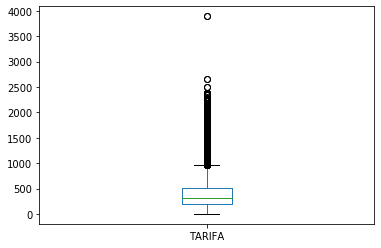

In [49]:
prices_2007["TARIFA"].plot.box()

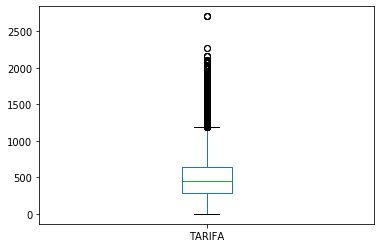

In [50]:
prices_2008["TARIFA"].plot.box()

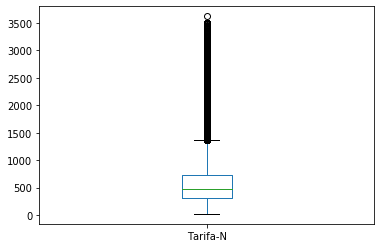

In [51]:
prices_2018["Tarifa-N"].plot.box()

In [75]:
prices_2018.isna().sum()

ANO                         4311060
MES                         4311060
EMPRESA                     4311060
ORIGEM                      4311060
DESTINO                     4311060
Tarifa-N                     384219
ASSENTOS                    4311060
Ano de Referência            802066
Mês de Referência            802066
ICAO Empresa Aérea           802066
ICAO Aeródromo Origem        802066
ICAO Aeródromo Destino       802066
Assentos Comercializados     802066
TARIFA                      4728907
dtype: int64

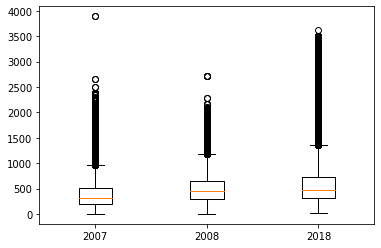

In [88]:
fig, ax = plt.subplots()
filtered_prices_2018 = prices_2018.dropna(subset=["Tarifa-N"])
ax.boxplot([prices_2007["TARIFA"], prices_2008["TARIFA"], filtered_prices_2018["Tarifa-N"]], labels=["2007", "2008", "2018"])

plt.show()

In [83]:
prices_200701["TARIFA"] = [str(x).replace(',', '.') for x in prices_200701["TARIFA"]]
prices_200701["TARIFA"] = pd.to_numeric(prices_200701["TARIFA"], errors="coerce")
prices_200702["TARIFA"] = [str(x).replace(',', '.') for x in prices_200702["TARIFA"]]
prices_200702["TARIFA"] = pd.to_numeric(prices_200702["TARIFA"], errors="coerce")
prices_200703["TARIFA"] = [str(x).replace(',', '.') for x in prices_200703["TARIFA"]]
prices_200703["TARIFA"] = pd.to_numeric(prices_200703["TARIFA"], errors="coerce")
prices_200704["TARIFA"] = [str(x).replace(',', '.') for x in prices_200704["TARIFA"]]
prices_200704["TARIFA"] = pd.to_numeric(prices_200704["TARIFA"], errors="coerce")
prices_200705["TARIFA"] = [str(x).replace(',', '.') for x in prices_200705["TARIFA"]]
prices_200705["TARIFA"] = pd.to_numeric(prices_200705["TARIFA"], errors="coerce")
prices_200706["TARIFA"] = [str(x).replace(',', '.') for x in prices_200706["TARIFA"]]
prices_200706["TARIFA"] = pd.to_numeric(prices_200706["TARIFA"], errors="coerce")
prices_200707["TARIFA"] = [str(x).replace(',', '.') for x in prices_200707["TARIFA"]]
prices_200707["TARIFA"] = pd.to_numeric(prices_200707["TARIFA"], errors="coerce")
prices_200708["TARIFA"] = [str(x).replace(',', '.') for x in prices_200708["TARIFA"]]
prices_200708["TARIFA"] = pd.to_numeric(prices_200708["TARIFA"], errors="coerce")
prices_200709["TARIFA"] = [str(x).replace(',', '.') for x in prices_200709["TARIFA"]]
prices_200709["TARIFA"] = pd.to_numeric(prices_200709["TARIFA"], errors="coerce")
prices_200710["TARIFA"] = [str(x).replace(',', '.') for x in prices_200710["TARIFA"]]
prices_200710["TARIFA"] = pd.to_numeric(prices_200710["TARIFA"], errors="coerce")
prices_200711["TARIFA"] = [str(x).replace(',', '.') for x in prices_200711["TARIFA"]]
prices_200711["TARIFA"] = pd.to_numeric(prices_200711["TARIFA"], errors="coerce")
prices_200712["TARIFA"] = [str(x).replace(',', '.') for x in prices_200712["TARIFA"]]
prices_200712["TARIFA"] = pd.to_numeric(prices_200712["TARIFA"], errors="coerce")

In [84]:
prices_200801["TARIFA"] = [str(x).replace(',', '.') for x in prices_200801["TARIFA"]]
prices_200801["TARIFA"] = pd.to_numeric(prices_200801["TARIFA"], errors="coerce")
prices_200802["TARIFA"] = [str(x).replace(',', '.') for x in prices_200802["TARIFA"]]
prices_200802["TARIFA"] = pd.to_numeric(prices_200802["TARIFA"], errors="coerce")
prices_200803["TARIFA"] = [str(x).replace(',', '.') for x in prices_200803["TARIFA"]]
prices_200803["TARIFA"] = pd.to_numeric(prices_200803["TARIFA"], errors="coerce")
prices_200804["TARIFA"] = [str(x).replace(',', '.') for x in prices_200804["TARIFA"]]
prices_200804["TARIFA"] = pd.to_numeric(prices_200804["TARIFA"], errors="coerce")
prices_200805["TARIFA"] = [str(x).replace(',', '.') for x in prices_200805["TARIFA"]]
prices_200805["TARIFA"] = pd.to_numeric(prices_200805["TARIFA"], errors="coerce")
prices_200806["TARIFA"] = [str(x).replace(',', '.') for x in prices_200806["TARIFA"]]
prices_200806["TARIFA"] = pd.to_numeric(prices_200806["TARIFA"], errors="coerce")
prices_200807["TARIFA"] = [str(x).replace(',', '.') for x in prices_200807["TARIFA"]]
prices_200807["TARIFA"] = pd.to_numeric(prices_200807["TARIFA"], errors="coerce")
prices_200808["TARIFA"] = [str(x).replace(',', '.') for x in prices_200808["TARIFA"]]
prices_200808["TARIFA"] = pd.to_numeric(prices_200808["TARIFA"], errors="coerce")
prices_200809["TARIFA"] = [str(x).replace(',', '.') for x in prices_200809["TARIFA"]]
prices_200809["TARIFA"] = pd.to_numeric(prices_200809["TARIFA"], errors="coerce")
prices_200810["TARIFA"] = [str(x).replace(',', '.') for x in prices_200810["TARIFA"]]
prices_200810["TARIFA"] = pd.to_numeric(prices_200810["TARIFA"], errors="coerce")
prices_200811["TARIFA"] = [str(x).replace(',', '.') for x in prices_200811["TARIFA"]]
prices_200811["TARIFA"] = pd.to_numeric(prices_200811["TARIFA"], errors="coerce")
prices_200812["TARIFA"] = [str(x).replace(',', '.') for x in prices_200812["TARIFA"]]
prices_200812["TARIFA"] = pd.to_numeric(prices_200812["TARIFA"], errors="coerce")

In [93]:
prices_201801["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201801["Tarifa-N"]]
prices_201801["Tarifa-N"] = pd.to_numeric(prices_201801["Tarifa-N"], errors="coerce")
prices_201802["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201802["Tarifa-N"]]
prices_201802["Tarifa-N"] = pd.to_numeric(prices_201802["Tarifa-N"], errors="coerce")
prices_201803["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201803["Tarifa-N"]]
prices_201803["Tarifa-N"] = pd.to_numeric(prices_201803["Tarifa-N"], errors="coerce")
prices_201804["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201804["Tarifa-N"]]
prices_201804["Tarifa-N"] = pd.to_numeric(prices_201804["Tarifa-N"], errors="coerce")
prices_201805["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201805["Tarifa-N"]]
prices_201805["Tarifa-N"] = pd.to_numeric(prices_201805["Tarifa-N"], errors="coerce")
prices_201806["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201806["Tarifa-N"]]
prices_201806["Tarifa-N"] = pd.to_numeric(prices_201806["Tarifa-N"], errors="coerce")
prices_201807["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201807["Tarifa-N"]]
prices_201807["Tarifa-N"] = pd.to_numeric(prices_201807["Tarifa-N"], errors="coerce")
prices_201808["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201808["Tarifa-N"]]
prices_201808["Tarifa-N"] = pd.to_numeric(prices_201808["Tarifa-N"], errors="coerce")
prices_201809["TARIFA"] = [str(x).replace(',', '.') for x in prices_201809["TARIFA"]]
prices_201809["TARIFA"] = pd.to_numeric(prices_201809["TARIFA"], errors="coerce")
prices_201810["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201810["Tarifa-N"]]
prices_201810["Tarifa-N"] = pd.to_numeric(prices_201810["Tarifa-N"], errors="coerce")
prices_201811["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201811["Tarifa-N"]]
prices_201811["Tarifa-N"] = pd.to_numeric(prices_201811["Tarifa-N"], errors="coerce")
prices_201812["Tarifa-N"] = [str(x).replace(',', '.') for x in prices_201812["Tarifa-N"]]
prices_201812["Tarifa-N"] = pd.to_numeric(prices_201812["Tarifa-N"], errors="coerce")

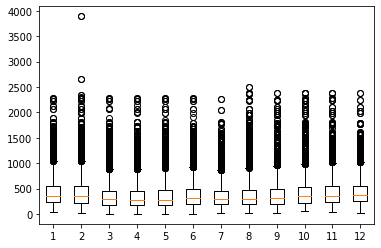

In [85]:
fig, ax = plt.subplots()
ax.boxplot([prices_200701["TARIFA"],
    prices_200702["TARIFA"],
    prices_200703["TARIFA"],
    prices_200704["TARIFA"],
    prices_200705["TARIFA"],
    prices_200706["TARIFA"],
    prices_200707["TARIFA"],
    prices_200708["TARIFA"],
    prices_200709["TARIFA"],
    prices_200710["TARIFA"],
    prices_200711["TARIFA"],
    prices_200712["TARIFA"]])

plt.show()

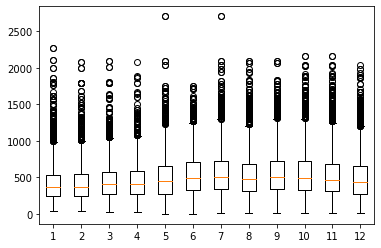

In [86]:
fig, ax = plt.subplots()
ax.boxplot([prices_200801["TARIFA"],
    prices_200802["TARIFA"],
    prices_200803["TARIFA"],
    prices_200804["TARIFA"],
    prices_200805["TARIFA"],
    prices_200806["TARIFA"],
    prices_200807["TARIFA"],
    prices_200808["TARIFA"],
    prices_200809["TARIFA"],
    prices_200810["TARIFA"],
    prices_200811["TARIFA"],
    prices_200812["TARIFA"]])

plt.show()

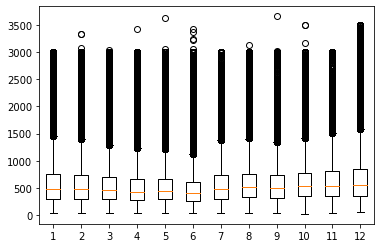

In [94]:
fig, ax = plt.subplots()
ax.boxplot([prices_201801["Tarifa-N"],
    prices_201802["Tarifa-N"],
    prices_201803["Tarifa-N"],
    prices_201804["Tarifa-N"],
    prices_201805["Tarifa-N"],
    prices_201806["Tarifa-N"],
    prices_201807["Tarifa-N"],
    prices_201808["Tarifa-N"],
    prices_201809["TARIFA"],
    prices_201810["Tarifa-N"],
    prices_201811["Tarifa-N"],
    prices_201812["Tarifa-N"]])

plt.show()

Para esta análise, foram utilizados os _datasets_ disponibilizados no site da ANAC. Primeiro, é possível notar que estes estão separados por mês e ano. Sendo assim, tínhamos 12 arquivos por ano - somando um total de 36 arquivos utilizados para os 3 anos analisados.

Dos CSVs usados, apenas uma coluna foi utilizada: _TARIFA_. Assim como na análise anterior, foi necessário converter os valores da coluna para _float_, dado que a vírgula para separação do decimal acabava fazendo com que o Pandas entendesse a coluna como do tipo _object_.

Vale notar também que o padrão para o nome de colunas dos arquivos do ano de 2018 são diferentes, e _TARIFA_ vira _Tarifa-N_.

Explicando o que foi feito: primeiro, todos os arquivos de um ano foram concatenados em um único _DataFrame_. Sendo assim, foram criados `prices_2007`, `prices_2008` e `prices_2018`. Para cada um desses _DataFrames_, foi criado um boxplot para comparar os preços de cada ano.

Depois, foi feita a análise mensal de cada ano. Neste caso, foi necessário fazer a conversão para _float_ de cada um dos arquivos lidos, e foi criado um gráfico para cada ano: cada um com 12 boxplots - um para cada mês do ano.

Seguem as conclusões tiradas da análise:
* Devido à grande quantidade de dados por ano, há um número considerável de valores _outliers_ - acima do limite superior;
* É possível notar um aumento nas tarifas em 2008 comparado à 2007;
* É interessante ver que os valores acima do limite superior de 2008 são menores que os de 2007. Então a maioria dos preços subiu, mas os valores máximos diminuiram;
* O terceiro quartil, limite superior e valores acima do limite superior são maiores em 2018, comparado aos outros dois anos;
* Na análise por mês, é possível ver que há pouca variação durante o ano de 2007. Já em 2008 e 2018, há um aumento das tarifas na segunda metade do ano.
* Na análise por mês, em **2007** os terceiros quartis ficam por volta de `R$500`, enquanto o limite superior fica por volta de `R$1000`. Em **2008**, os terceiros quartis ultrapassam a marca de `R$500` no segundo semestre, enquanto o limite superior fica por volta de `R$1000 ~ 1200`. Já em **2018**, os terceiros quartis ficam por volta de `R$750`, enquanto o limite superior fica por volta de `R$1500`.

### Q3

Para verificar que a definição satisfaz as propriedades de distância, temos que ver que:

#### 1. $d_k(p, q) >= 0$

Primeiro, temos que $|a|^b >= 0$ $\forall a, b$  $\in \mathbb{R}$. Logo, $|p_i - q_i|^k >= 0$.

Como $c_i > 0$, então $c_i|p_i - q_i|^k >= 0$ e $(\sum_{i=1}^{d} c_i|p_i - q_i|^k) >= 0$.

Por fim, como a somatória é não-negativa, então este valor elevado à $\frac{1}{k}$ também é. Portanto, $d_k(p, q) >= 0$.

#### 2. $d_k(p, q) = 0$, então $p = q$

Temos que $d_k(p, q) >= 0$. Sendo assim, para que $d_k(p, q) = 0$, todos os valores da somatória devem ser $0$.

Como $c_i > 0$, para que $c_i|p_i - q_i|^k = 0$ é necessário que $|p_i - q_i| = 0$. Então:

$p_i - q_i = 0$

$p_i = q_i$

Por fim, para que a somatória seja $0$, $p_i = q_i \forall i \implies p = q$

#### 3. $d_k(p, q) = d_k(q, p)$

#### 4. $d_k(p, r) <=  d_k(p, q) + d_k(q, r)$

### Q4

Vamos executar o algoritmo _k-means_ para os argumentos $S = \{(1, 4),(1, 3),(0, 4),(5, 1),(6, 2),(4, 0)\}$, $k = 2$

Definimos dois centroides $c_1 = (0, 3)$ e $c_2 = (5, 0)$.

Agora, utilizando a distância euclidiana, vamos verificar quais pontos pertencem a quais clusters:

1. Ponto $(1, 4)$
    * $d((1,4), c_1) = \sqrt{2}$
    * $d((1,4), c_2) = \sqrt{32}$
    * Logo, este ponto percente ao cluster de $c_1$
2. Ponto $(1, 3)$
    * $d((1,3), c_1) = 1$
    * $d((1,3), c_2) = 5$
    * Logo, este ponto percente ao cluster de $c_1$
3. Ponto $(0, 4)$
    * $d((0,4), c_1) = 1$
    * $d((0,4), c_2) = \sqrt{41}$
    * Logo, este ponto percente ao cluster de $c_1$
4. Ponto $(5,1)$
    * $d((5,1), c_1) = \sqrt{29}$
    * $d((5,1), c_2) = 1$
    * Logo, este ponto percente ao cluster de $c_2$
5. Ponto $(6,2)$
    * $d((6,2), c_1) = \sqrt{37}$
    * $d((6,2), c_2) = \sqrt{5}$
    * Logo, este ponto percente ao cluster de $c_2$
6. Ponto $(4,0)$
    * $d((4,0), c_1) = 5$
    * $d((4,0), c_2) = 1$
    * Logo, este ponto percente ao cluster de $c_2$

Assim temos que:
* O cluster de $c_1$ possui os pontos ${(1,4),(1,3),(0,4)}$
* O cluster de $c_2$ possui os pontos ${(5,1),(6,2),(4,0)}$

Agora, vamos calcular novos centroides baseados nos pontos pertencentes a cada cluster:
* Centroide $c_1 = (x_1, y_1)$
    * $x_1 = \frac{(1 + 1 + 0)}{3} = \frac{2}{3}$
    * $y_1 = \frac{(4 + 3 + 4)}{3} = \frac{11}{3}$
    * Logo, o novo centroide é $c_1 = (\frac{2}{3},\frac{11}{3})$
* Centroide $c_2 = (x_2, y_2)$
    * $x_2 = \frac{(5 + 6 + 4)}{3} = 5$
    * $y_2 = \frac{(1 + 2 + 0)}{3} = 1$
    * Logo, o novo centroide é $c_2 = (5, 1)$
  
Repetimos então o processo de associar os pontos a um cluster:
1. Ponto $(1, 4)$
    * $d((1,4), c_1) ≃ 0.47$
    * $d((1,4), c_2) = 5$
    * Logo, este ponto percente ao cluster de $c_1$
2. Ponto $(1, 3)$
    * $d((1,3), c_1) ≃ 0.74$
    * $d((1,3), c_2) = \sqrt{20}$
    * Logo, este ponto percente ao cluster de $c_1$
3. Ponto $(0, 4)$
    * $d((0,4), c_1) ≃ 0.74$
    * $d((0,4), c_2) = \sqrt{34}$
    * Logo, este ponto percente ao cluster de $c_1$
4. Ponto $(5,1)$
    * $d((5,1), c_1) ≃ 5.09$
    * $d((5,1), c_2) = 0$
    * Logo, este ponto percente ao cluster de $c_2$
5. Ponto $(6,2)$
    * $d((6,2), c_1) ≃ 5.58$
    * $d((6,2), c_2) = \sqrt{2}$
    * Logo, este ponto percente ao cluster de $c_2$
6. Ponto $(4,0)$
    * $d((4,0), c_1) ≃ 4.95$
    * $d((4,0), c_2) = \sqrt{2}$
    * Logo, este ponto percente ao cluster de $c_2$
  
Como os pontos se mantem nos mesmos clusters, então atingimos a conversão e, portanto, temos os dois clusters:
* O cluster de $c_1$ possui os pontos ${(1,4),(1,3),(0,4)}$
* O cluster de $c_2$ possui os pontos ${(5,1),(6,2),(4,0)}$

## Q5

#### Suppose you build a classifier that answer yes on every possible input. What precision and recall will this classifier achieve?

#### Explain what precision and recall are. How do they relate to the ROC curve?

#### Is it better to have too many false positives, or too many false negatives? Explain.

#### What is cross-validation? How might we pick the right value of k for k-fold cross-validation?

#### Explain why we have training, test, and validation data sets and how they are used effectively?

#### Explain why we need so many performance measures for a classifier (precision, recall, F1, accuracy etc) and how they are used in practice?

### Q6

#### Favoritismos `#37`: veja quais equipes têm mais chances de vencer na rodada do Brasileirão via Numerólogos do Globoesporte - Exemplo Ruim

https://globoesporte.globo.com/numerologos/noticia/favoritismos-37-veja-quais-equipes-tem-mais-chances-de-vencer-na-rodada-do-brasileirao.ghtml

Este é um exemplo ruim de apresentação de dados estatísticos relacionados à 37ª rodada do Campeonato Brasileiro de futebol, no qual há uma imagem para cada jogo da rodada.

Os dados apresentados não aparentam ser viesados.

Os pontos negativos se mostram em como os dados estão distribuídos na imagem. Há uma lupa com uma porcentagem, sem uma legenda para explicitar o que ela significa. Assume-se que seja a porcentagem de aproveitamento do clube. Além disso, os gráficos tem marcações confusas para o eixo Y, e o eixo X nem possui marcações. A ordem dos gráficos é invertida entre os times, sendo difícil de compará-los. Em geral, é difícil de visualizar e entender os números mostrados.

São usadas muitas cores. É possível diferenciar cada uma das partes que querem ser mostradas, apesar de ser difícil de entender os dados em si.

Uma forma de melhorar os dados mostrados seria reogrnizar a forma como são mostrados, pois não há necessidade em espalhá-los pela imagem. Segue uma lista de sugestões:
  * organizar os dados verticalmente;
  * usar a mesma ordem para os dois times;
  * refazer os gráficos adicionando título, _labels_ e marcações para os dois eixos;
  * adicionar legendas para as porcentagens mostradas.
  
#### Quem são as principais vítimas de homicídio no Brasil via Nexo Jornal - Exemplo Bom

https://www.nexojornal.com.br/grafico/2019/11/19/Quem-s%C3%A3o-as-principais-v%C3%ADtimas-de-homic%C3%ADdio-no-Brasil

Neste exemplo, temos um gráfico de colunas e três gráficos de linhas, na seção de Gráficos do Nexo Jornal.

Em geral, os dados são bem apresentados e não aparentam ser viesados. Os gráficos tem títulos, marcações nos dois eixos, legendas, cores bem definidas. É possível entender o que é passado com facilidade.

Uma sugestão seria normear os eixos. Nos gráficos de linhas, no qual o eixo X representa os anos de 2012 à 2017, não é explicitado que o eixo X representa um ano, apesar de ser fácil de entender.

#### Uma análise visual das finais da Libertadores via Nexo Jornal - Exemplo bom

https://www.nexojornal.com.br/grafico/2019/11/22/Uma-an%C3%A1lise-visual-das-finais-da-Libertadores

Novamente, um bom exemplo de representação de dados pelo Nexo Jornal. Desta vez, uma análise sobre as finais do campeonato de futebol intercontinental da América do Sul: Libertadores da América. São mostradas representações dos campeões e vice-campeões por país, onde as finais ocorreram, quantidade de jogos da final, número de jogos de final por época do ano, minutos de jogo nos quais ocorreram gols em final e média de gols por final.

Ao total, são 7 representações nesta matéria, incluindo diversos tipos de gráficos. Novamente, os dados são bem apresentados e não aparentam ser viesados. Possuem títulos, marcações nos eixos, legendas e cores bem definidas, facilitando o entendimento.

No entanto, há algumas sugestões a serem feitas para os últimos gráficos mostrados:
* No gráfico _Número de jogos de final por época do ano_ :
  * Novamente, os eixos não possuem um _label_. Apesar de ser fácil perceber que o eixo Y representa a quantidade de jogos e o eixo X representa o mês no qual o jogo ocorreu, essas informações poderiam ser explicitadas.
* No gráfico _Quando ocorrem os gols nos jogos de final da Libertadores_ :
  * À primeira vista parece ser um gráfico de dispersão, mas depois percebe-se que não há eixo X. Os pontos estão distribuídos verticalmente, e não há diferença se o ponto - que representa um gol - está mais à esquerda ou à direita. Isso acabou confundindo um pouco na primeira impressão
* No gráfico _Média de gols por jogo da final_ :
  * Novamente, não há _labels_ para os eixos e estes poderiam ser explicitados;
  * Os marcadores para o eixo X estão confusos. Poderia ser mais explícito, como `de 1960 à 1969` ou `1960~1969`.

#### Review Galaxy Note 10+: o melhor smartphone da Samsung vale o preço? via TecMundo - Exemplo ruim

https://www.tecmundo.com.br/dispositivos-moveis/146312-review-galaxy-note-10-melhor-smartphone-samsung-vale-o-preco.htm

Por último, um _review_ do _smartphone_ Galaxy Note 10+ feito pelo site TecMundo, um site de notícias e análises sobre tecnologia. Nesta matéria, há gŕaficos para representar a pontuação feita pelo celular em vários softwares de benchmark, utilizados para verificar a potência do _smartphone_.

Os gráficos são todos de barras e focam numa estética mais moderna. No entanto, acaba pecando fortemente na consistência da representação, dado que as barras do gráfico não possuem a mesma escala. Sendo assim, os gráficos dão a sensação de que certos celulares fizeram pontuações muito diferentes do que o que foi realmente testado, e dá a impressão de que os dados são mostrados de forma viesada.

Além disso, a qualidade da imagem dos gráficos não é boa, eles não possuem marcações ou _labels_ nos eixos, e as cores escolhidas para o gráfico _Geekbench 4_ não possuem um bom contraste entre si.

Sugestões para melhorar os gráficos incluem:
* Criar marcações para eixo X;
* Criar _labels_ para os eixos;
* Ajustar as cores no gráfico _Geekbench 4_ para que tenham mais contraste entre si;
* Ajustar o tamanho das barras para que representem de forma correta o valor da pontuação. Em destaque, temos o gráfico _Geekbench 4_, no qual analisando apenas os dados _single-core_:
  * o valor `4820` - que é o maior - aparece com a menor barra;
  * os valores `3262`, `4411` e `4820` aparecem muito próximos, enquanto `4523` aparece disparado na frente - mesmo sendo  apenas o segundo maior valor.

### Q7

### Q10 

1. Não, não assisti todas as aulas presenciais. A maioria das faltas ocorreu devido ao meu estágio e outros compromissos. Quando eu tinha algum compromisso pessoal que tomava tempo do estágio - como uma consulta médica, por exemplo - eu precisava compensar esse tempo em outro dia. Por isso, tive que sacrificar a presença em algumas aulas (dessa e de outras disciplinas);
2. Sinto que consegui entender a ideia geral e os conceitos básicos passados. No entanto, não consegui me aprofundar muito nos detalhes, muitas vezes por falta de conhecimento;
3. Sim, participei da discussão de perguntas dos _datasets_ e apresentação da EDA do meu grupo. Considero que minha participação foi boa - sinto que consegui trazer _insights_ interessantes;
4. Procurei por alguns datasets de assuntos que me interessavam - como futebol, por exemplo - para tentar fazer uma EDA sobre um assunto com o qual eu tinha mais intimidade. Não cheguei a me aprofundar nas técnicas de EDA passadas em sala, nem em bibliotecas como o Seaborn, mas foi uma tarefa divertida de se realizar;
5. Devido ao estágio (de 30h semanais) eu possuía pouco tempo para estudar durante a semana: aproximadamente 1 hora de estudos por dia, sem contar os fins de semana. Além desta disciplina, eu peguei outras 4 neste semestre, sendo que o tempo que dediquei para cada uma delas foi proporcionalmente igual - aproximadamente 2 horas semanais;
6. Acho que o conteúdo da aula em si era interessante, mas havia motivos extra-aula que desmotivam a presença, como: a sala de aula (disposição das cadeiras é ruim, espaço ruim, acústica ruim, sem ar condicionado e com ventiladores muito barulhentos), horário (qualquer aula às 8h da manhã é desmotivadora);
7. Sim, acho que satisfez. Eu não tinha nenhuma espectativa específica para esta disciplina e achei interessante tanto os trabalhos, quanto discussões/apresentações e ver sobre bibliotecas como Pandas e até sobre Spark;
8. Não há nenhum tópico específico que eu queria ter visto. No entanto, sobre os tópicos apresentados em aula,acho que os tópicos sobre clusterização e tipos de plots foram passados de forma muito rápida. Foi difícil entender tanto o conceito de clusterização quanto vantagens/desvantagens de cada tipo de plot.
9. Sim, acho que a quantidade e dificuldade das tarefas foi adequada. Me sinto seguro de continuar estudando sozinho, apesar de que eu teria que revisar/aprofundar alguns conceitos estatísticos/matemáticos. Não tenho nenhuma sugestão para melhorar as tarefas. Fazendo uma análise dos métodos de avaliação passados durante o semestre:
    - **Questões em sala**: achei as questões justas. Eram questões simples, sobre o assunto da aula (normalmente) e não havia necessidade de serem muito formais como método de avaliação;
    - **Discussão em grupos sobre os datasets**: achei uma tarefa interessante por ser diferente e por ser durante a aula;
    - **Apresentação da EDA feita em grupo**: interessante para ver não só as análises dos outros grupos, mas entender um pouco como pessoas que estão mais acostumadas com esses tipos de análise trabalham em contraste a pessoas que nunca mexeram com isso;
    - **Trabalhos individuais (EDA, lista de exercícios, prova)**: questões são justas. As avaliações não possuem uma formalidade tanto no formato de respostas quanto no tempo de entrega, o que às vezes pode causar um pouco de confusão, mas entendo que o objetivo primário é o aprendizado e não a avaliação em si.
10. Eu não possuía conhecimento anterior sobre a área, o que dificultou o entendimento de alguns dos tópicos trazidos. Não consegui dedicar tanto tempo aos estudos e nem estar presente em todas as aulas devido ao estágio. Apesar disso, acho que consegui entender os conceitos básicos, participar as atividades em grupo, fiz a apresentação da EDA e dediquei um pouco do tempo extraclasse à procurar um pouco mais sobre os assuntos vistos em sala. Sendo assim, atribuo uma **nota 8 nesta auto-avaliação**.